In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Assignment 3: Market Indices

Name: ----

Student Number: ----

Due: 2021/10/29 at 11:59pm on Dropbox

What to submit: both your .ipynb and .pdf files.

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

## Rules
* Follow the format of the template notebook to complete this assignment
* Make sure to comment on any new variables and functions that you are using. If you are doubtful whether you should explain a part of your code, it is better to explain it. 
* Please make sure to conclude your final answers in a statement (if applicable) at the end of each question.
* AVOID hard-coding numbers, for example, if you want to know how many elements are in a string (and other data structures), use the len() method, DO NOT count the number by hand.

## Objectives
At the end of the assignment, you will:
* Understand the different methods to build a market index
* Understand how the value of a market index can change over time

## BONUS

After you have completed the assignment as instructed, you will hand in your two files.  The bonus part is separate from this, and saved under a new file titled "Market_Index_Bonus_NAME.ipynb" where NAME is your complete name.  You need only hand in your bonus code, thus if you are doing the bonus, you will hand in three files, two for the main assignment, and one for the bonus.  Please note that this bonus quesiton is not easy, and the bonus point will only be awarded if you are sucessful.  DO NOT hand in unsuccessful attempts.  Although this part is not worth much relative to the amount of work it will take, this level of coding will be required in the group assignment, and potentially in individual assignment 4.  Thus, it may be worth attempting so that you aren't overwhelmed later.

To complete the bonus part, you must write fully dynamic code that allows the user (your professor and the marker) to specify any (finite) number of (valid) US stock tickers to include in the index.  Your code must start by defining a list: Tickers = ["ticker1", "ticker2", "ticker3",...,"tickerN"]

We will test your code with a predefined list of tickers, the length of which is unknown to you (hint: it will be greater than 3, but not so large that it will take too long to call up all the market data and manipulate it).  We promise you that the tickers we use will be value US stocks that have complete data available for the time period in question.

### Data 

For this assignment, all the data will come from **Yahoo Finance**. This will be used to collect the stock information, and then you will use Python to complete the remainder of the assignment. 

**Language:** Python 

**Libraries Allowed:** pandas, matplotlib, yfinance

## Q1 - Building a Market Index

For this question, you will be using the given USD stocks to build your indices, there will be no need to do any currency conversion for this assignment. For this sample assignment, we will be using: 
* Mitsubishi UFJ Financial Group Inc (MUFG)
* Bank of America Corp (BAC)
* Seabord Corp (SEB)

We will be focusing on the two most common market index types, a price weighted index and a market capitalization index. Please refer to chapter 8 of the text and the corresponing class slides for a discussion of these two types of indices.  

For each index, determine the portfolio value based on the weights. This information should be stored in a DataFrame with a column for the date, each stock price, their respective weights and the final portfolio value at each point in time. 

For each method, use data from `Jan 1, 2018` to `Jan 1, 2021` to build the indices. The prices you use should be the **CLOSING** prices.

### a) Price Weighted Index
We will use the simplest method, as discussed in the class slides.  "In the simplest form, an average/price weighted index is calculated by adding each stock price and dividing by the # of stocks".  This is what the price weighted index will track over time.

Display the first five values of the date and portfolio value.

### b) Market Capitalisation Weighted Index
Each stock is weighted according to its market capitalization relative to the other stocks.  The beginning value of the index is arbitrary, it simply represents a size of your portfolio.  The key is that your portfolio is created according to the weights of each individual stock.  To allow us to compare the two index methods, you are to set the the **first market weighted index value equal to the first price weighted index value**.  If for example, the first price weighted index value is 1000, then you can imagine that this is the amount of money that you have to build your market capitalization index portfolio.   You will need to calculate the number of shares you purchase using the weights and prices of that first day. The next day you will update according to new prices and weightings to determine the next portfolio.   It may be helpful to imagine that at each day, you sell your portfolio at the prevailing prices, and then purchase a new portfolio according to the new weights with the money from the sold portfolio.  Although this may sound like a lot of details, it is precisely how the S&P 500 index is derived each day.

Display the first five values of the date and the respective portfolio values from the DataFrame.


**HINT:** It will be useful to have your DataFrame contain the prices of the stocks and the number of shares purchased of each stock for each day.

**HINT:** To obtain your index value at each point in time, you will require information from one period before.  This is best accomplished with the use of a for loop.

**ASSUMPTION:** To calculate the market capitalisation, you can make the assumption that the number of shares outstanding does not change and multiply that by the share price for each day.

In [2]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [3]:
# Part a

# Extract all tickers
mufg = yf.Ticker('MUFG')
bac = yf.Ticker('BAC')
seb = yf.Ticker('SEB')

# Extract history from all three tickers
mufg_hist = mufg.history(start = '2018-01-01', end = '2021-01-01')
bac_hist = bac.history(start = '2018-01-01', end = '2021-01-01')
seb_hist = seb.history(start = '2018-01-01', end = '2021-01-01')

# Create the dataframe for the market index
market_index = pd.DataFrame()
market_index["Mitsubishi"] = mufg_hist['Close']
market_index["Bank of America Corp"] = bac_hist['Close']
market_index["Seabord Corp"] = seb_hist['Close']
market_index["Price Weighted Index"] = (market_index["Mitsubishi"] 
                                        + market_index["Bank of America Corp"]
                                        + market_index["Seabord Corp"]) / 3

market_index.head()

,Mitsubishi,Bank of America Corp,Seabord Corp,Price Weighted Index
Date,,,,
2018-01-02,7.35,27.561296,4334.925293,1456.612196
2018-01-03,7.41,27.469124,4310.077637,1448.318920
2018-01-04,7.58,27.828619,4347.527344,1460.978654
2018-01-05,7.64,27.957670,4244.794434,1426.797368
2018-01-08,7.67,27.764095,4194.730957,1410.055017


In [4]:
# Part b

# Extract the outstanding shares for the companies
mufg_outstanding = mufg.info['sharesOutstanding']
bac_outstanding = bac.info['sharesOutstanding']
seb_outstanding = seb.info['sharesOutstanding']

# Calculate the market capitalization for each company
mufg_market_cap = market_index['Mitsubishi'] * mufg_outstanding
bac_market_cap = market_index['Bank of America Corp'] * bac_outstanding
seb_market_cap = market_index['Seabord Corp'] * seb_outstanding
total_cap = mufg_market_cap + bac_market_cap + seb_market_cap

# Calculate the market weight for each company
mufg_weight = mufg_market_cap / total_cap
bac_weight = bac_market_cap / total_cap
seb_weight = seb_market_cap / total_cap

# Extract each individual close prices
mufg_close = mufg_hist['Close']
bac_close = bac_hist['Close']
seb_close = seb_hist['Close']

# Calculate the market weighted index for the first day
first_weighted_index = market_index.loc['2018-01-02', 'Price Weighted Index']


# Create a new DataFrame
market_cap_index = pd.DataFrame()
market_cap_index['Mitsubishi'] = mufg_close
market_cap_index['MUFG Weight'] = mufg_weight
market_cap_index['MUFG Shares'] = mufg_outstanding
market_cap_index["Bank of America"] = bac_close
market_cap_index['BAC Weight'] = bac_weight
market_cap_index['BAC Shares'] = bac_outstanding
market_cap_index['Seabord Corp'] = seb_close
market_cap_index['SEB Weight'] = seb_weight
market_cap_index['SEB Shares'] = seb_outstanding
market_cap_index['Index Value'] = seb_outstanding

market_cap_index.loc['2018-01-02', 'Index Value'] = first_weighted_index

In [5]:
# # Calculate the number of shares

# market_cap_index.iloc[0, 2] = (market_cap_index.iloc[0, 1] * market_cap_index.iloc[0, 9]) / market_cap_index.iloc[0, 0]
# market_cap_index.iloc[0, 5] = (market_cap_index.iloc[0, 4] * market_cap_index.iloc[0, 9]) / market_cap_index.iloc[0, 3]
# market_cap_index.iloc[0, 8] = (market_cap_index.iloc[0, 7] * market_cap_index.iloc[0, 9]) / market_cap_index.iloc[0, 6]

# for i in range(1, len(market_cap_index)): 
    
#         # Get the previous day's portfolio value
#         mufg_sell_portfolio = market_cap_index.iloc[i - 1, 2] * market_cap_index.iloc[i, 0]
#         mufg_current_stocks = (mufg_sell_portfolio * market_cap_index.iloc[i, 1]) / market_cap_index.iloc[i, 0]
#         mufg_current_portfolio = mufg_current_stocks * market_cap_index.iloc[i, 0]
    
#         bac_sell_portfolio = market_cap_index.iloc[i - 1, 5] * market_cap_index.iloc[i, 3]
#         bac_current_stocks = (bac_sell_portfolio * market_cap_index.iloc[i, 4]) / market_cap_index.iloc[i, 3]
#         bac_current_portfolio = bac_current_stocks * market_cap_index.iloc[i, 3]
    
#         seb_sell_portfolio = market_cap_index.iloc[i - 1, 8] * market_cap_index.iloc[i, 6]
#         seb_current_stocks = (seb_sell_portfolio * market_cap_index.iloc[i, 7]) / market_cap_index.iloc[i, 6]
#         seb_current_portfolio = seb_current_stocks * market_cap_index.iloc[i, 6]
    
    
#         market_cap_index.iloc[i, 2] = mufg_current_stocks
#         market_cap_index.iloc[i, 5] = bac_current_stocks
#         market_cap_index.iloc[i, 8] = seb_current_stocks
#         market_cap_index.iloc[i, 9] = (mufg_current_portfolio + bac_current_portfolio + seb_current_portfolio)
    
# market_cap_index

In [6]:
# Calculate the number of shares for the first day

market_cap_index.iloc[0, 2] = (market_cap_index.iloc[0, 1] * market_cap_index.iloc[0, 9]) / market_cap_index.iloc[0, 0]
market_cap_index.iloc[0, 5] = (market_cap_index.iloc[0, 4] * market_cap_index.iloc[0, 9]) / market_cap_index.iloc[0, 3]
market_cap_index.iloc[0, 8] = (market_cap_index.iloc[0, 7] * market_cap_index.iloc[0, 9]) / market_cap_index.iloc[0, 6]

for i in range(1, len(market_cap_index)): 
    
    # Get the previous day's portfolio value
    previous_portfolio = market_cap_index.iloc[i - 1, 9]
    
    mufg_weight = market_cap_index.iloc[i, 1]
    mufg_previous_price = market_cap_index.iloc[i - 1, 0]
    mufg_shares = (mufg_weight * previous_portfolio) / mufg_previous_price
    mufg_current_price = market_cap_index.iloc[i, 0]
    mufg_portfolio = mufg_shares * mufg_current_price
    
    
    bac_weight = market_cap_index.iloc[i, 4]
    bac_previous_price = market_cap_index.iloc[i - 1, 3]
    bac_shares = (bac_weight * previous_portfolio) / bac_previous_price
    bac_current_price = market_cap_index.iloc[i, 3]
    bac_portfolio = bac_shares * bac_current_price
    
    seb_weight = market_cap_index.iloc[i, 7]
    seb_previous_price = market_cap_index.iloc[i - 1, 6]
    seb_shares = (seb_weight * previous_portfolio) / seb_previous_price
    seb_current_price = market_cap_index.iloc[i, 6]
    seb_portfolio = seb_shares * seb_current_price
    
    market_cap_index.iloc[i, 2] = mufg_shares
    market_cap_index.iloc[i, 5] = bac_shares
    market_cap_index.iloc[i, 8] = seb_shares
    market_cap_index.iloc[i, 9] = (mufg_portfolio + bac_portfolio + seb_portfolio)
    
market_cap_index

,Mitsubishi,MUFG Weight,MUFG Shares,Bank of America,BAC Weight,BAC Shares,Seabord Corp,SEB Weight,SEB Shares,Index Value
Date,,,,,,,,,,
2018-01-02,7.35,0.288910,57.255732,27.561296,0.695679,36.766552,4334.925293,0.015412,0.005179,1456.612196
2018-01-03,7.41,0.291285,57.726383,27.469124,0.693391,36.645662,4310.077637,0.015324,0.005149,1456.570104
2018-01-04,7.58,0.293307,57.654749,27.828619,0.691478,36.666112,4347.527344,0.015216,0.005142,1479.745273
2018-01-05,7.64,0.294108,57.414927,27.957670,0.691112,36.748864,4244.794434,0.014780,0.005030,1487.415858
2018-01-08,7.67,0.296391,57.703691,27.764095,0.688948,36.653720,4194.730957,0.014661,0.005137,1481.794546
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,4.34,0.184002,60.017099,29.535604,0.804106,38.689929,3101.258301,0.011892,0.005441,1420.079588
2020-12-28,4.43,0.186238,60.938288,29.703196,0.801864,38.553830,3129.216797,0.011898,0.005448,1432.177620
2020-12-29,4.42,0.186495,60.292076,29.584898,0.801584,38.649377,3123.886475,0.011922,0.005456,1426.973503


## Q2 - Visualizing Index Over Time

Using the indices created in Question 1, create a 2 x 1 subplot using `matplotlib` that visualizes the portfolio (index) value over time for each method. Make sure to include appropriate titles, subplot titles, and axis labels. You will be creating this graph for two time-periods.

### a) Daily 
Visualize the daily portfolio value over time.

### b) Monthly
Visualize the monthly portfolio value over time.  To do this, graph the portfolio value at the first date available of every month for both methods. Create a function that does the heavy lifting: it should cycle through all of the months.  The name of the function should be get_monthly_data.  It should take in a dataFrame as a parameter (this dataframe will contain daily data), and return a new dataframe with monthly data.

### c) Compare a) and b)
Discuss the difference(s) between the plots using daily and monthly data. What do you notice between the two different indices (price versus market cap weighted)? How are they similar/different?

In [7]:
%%latex
\newpage

<IPython.core.display.Latex object>

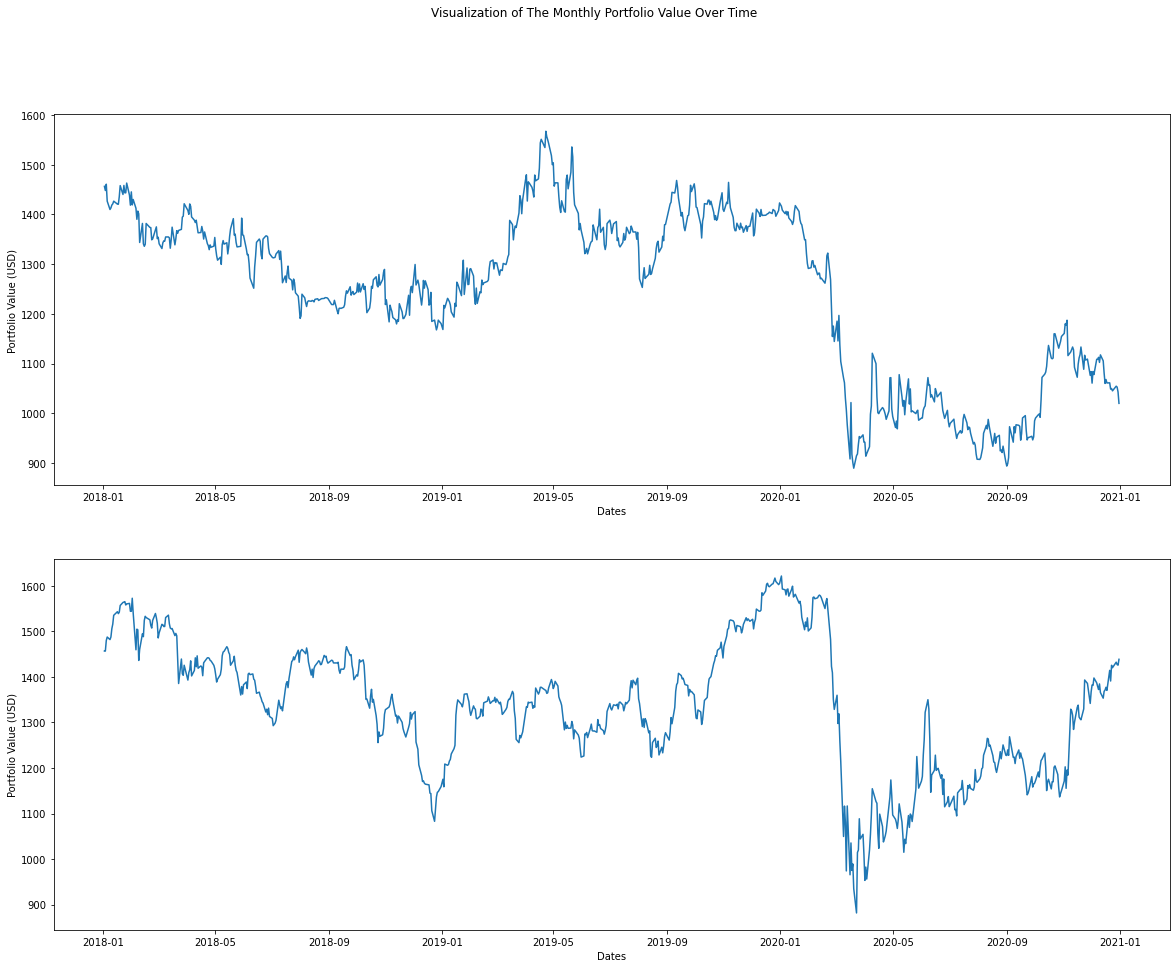

In [8]:
# Part a

fig, ((ax1), (ax2)) = plt.subplots(2,1)
fig.set_size_inches(20, 15)

# Overall title
fig.suptitle('Visualization of The Monthly Portfolio Value Over Time')

# Subplot 1 
ax1.plot(market_index.index, market_index["Price Weighted Index"])

# Subplot 2
ax2.plot(market_cap_index.index, market_cap_index['Index Value'])

ax1.set_ylabel("Portfolio Value (USD)")
ax1.set_xlabel("Dates")
ax2.set_ylabel("Portfolio Value (USD)")
ax2.set_xlabel("Dates")

plt.show()

In [18]:
from datetime import datetime

In [20]:
# Part b

monthly_data = pd.DataFrame()

# Define function to get the monthly data
def get_monthly_data(data):
    
    # Change datetime index to string
    dates = data.index.strftime('%Y-%m-%d')

    # Reset the string dates as the index
    data.set_index(dates, inplace = True)

    # Determine the first available day of each month
    for x in range (1, (len(dates))):
        year = dates[x][5:7]
        mon = dates[x + 1][5:7]

        if x == 0:
            monthly_data = [dates[0]]
        elif year != mon:
            monthly_data.append(dates[x + 1])

    return data[data.index.isin(monthly_data)]

#Runs the function get_monthly_data on the Market Cap Weight Index and Price Weight Index
monthly_market_cap_index = get_monthly_data(market_cap_index)
monthly_price_weighted_index = get_monthly_data(market_index)

#Specifiy number of rows and columns (2,1) and define axes for each plot
fig, ((ax1), (ax2)) = plt.subplots(2,1)

#Set size of the plot
fig.set_size_inches(20,15)

#Overall title
fig.suptitle('Monthly Value for Price Index and Market C')

AttributeError: 'Index' object has no attribute 'strftime'

In [ ]:
# # Part b

# def get_monthly_data(data):
#     new_data = data
#     new_data.drop(data.index[1: 21], inplace = True)
#     new_data.drop(data.index[2: 20], inplace = True)
#     new_data.drop(data.index[3: 23], inplace = True)
#     new_data.drop(data.index[4: 24], inplace = True)
#     new_data.drop(data.index[5: 26], inplace = True)
#     new_data.drop(data.index[6: 26], inplace = True)
#     new_data.drop(data.index[7: 27], inplace = True)
#     new_data.drop(data.index[8: 30], inplace = True)
#     new_data.drop(data.index[9: 27], inplace = True)
#     new_data.drop(data.index[10: 32], inplace = True)
#     new_data.drop(data.index[11: 31], inplace = True)
#     new_data.drop(data.index[12: 30], inplace = True)
#     new_data.drop(data.index[13: 31], inplace = True)
#     new_data.drop(data.index[14: 31], inplace = True)
#     new_data.drop(data.index[15: 600], inplace = True)
# #     data.drop(data.index[16: 23], inplace = True)
# #     data.drop(data.index[17: 23], inplace = True)
# #     data.drop(data.index[18: 23], inplace = True)
# #     data.drop(data.index[19: 23], inplace = True)
# #     data.drop(data.index[20: 23], inplace = True)
# #     data.drop(data.index[21: 23], inplace = True)
# #     data.drop(data.index[22: 23], inplace = True)
# #     data.drop(data.index[23: 23], inplace = True)
# #     data.drop(data.index[24: 23], inplace = True)

#     return new_data
    
# monthly_data = get_monthly_data(market_cap_index)

# monthly_data
    
    

## Q3 - Returns


### a) Calculating Monthly Returns 
For the price method and the market cap method, calculate the one-period monthly returns (hint, if you want to save some time, consider using hte pct_change() method). Store the returns for each method in one DataFrame for each time frame so that it has the following columns: `Date`, `Index Value Return`, `Market Cap Return`. Display the last five values and then graph the two values superimposed in one plot. Make sure to include appropriate titles, axis labels and a legend.

Graph these returns for the data from 2018.  Remember to label your graph well.

In [ ]:
%%latex
\newpage

### b) Analysis

#### i. Discrepancies
Can you find any cases where the price index returns and market cap returns are going in opposite directions? When does this occur? If there are multiple occurrences, pick one stark region to discuss.  If there are no occurences where the returns move in opposite directions, choose a time when the slopes are signficantly different. 

In [ ]:
%%latex
\newpage

#### ii. Source of Discrepancy
Now that you have the time period, dig into the data to find what could have caused the discrepancies between the two measures' returns during this time period.  This part should be thoroughly quantitatively analyzed.  You should support your analysis with an equally thoroughly written discussion.   

In [ ]:
%%latex
\newpage